# Multiple Linear Regression

In this part, you will implement linear regression with multiple variables to predict the
prices of houses. Suppose you are selling your house and you want to know what a good market
price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices. The file ex4dataset.txt contains a training set of housing prices. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [1]:
%Load Data
data = csvread('/home/prathamesh/OSL/E02/ex4dataset.txt'); % can also use load function
X = data(:,1:2);
y = data(:,3);
m = length(y);

In [2]:
X(1:5,:) % looking at few rows of X

ans =

   2104      3
   1600      3
   2400      3
   1416      2
   3000      4



In [3]:
y(1:5) % looking at few rows of y

ans =

   399900
   329900
   369000
   232000
   539900



In [4]:
% Feature Normalization
function [X_norm, mu, sigma] = normalize(X)
    
    
%   Normalizes the features in X 
%   normalize(X) returns a normalized version of X where
%   the mean value of each feature is 0 and the standard deviation
%   is 1. This is often a good preprocessing step to do when
%   working with learning algorithms.
    
    mu = mean(X); % matrix of means of X values
    sigma = std(X); % matrix of std's of X    
    X_norm = (X - mu) ./ sigma ;

end     

In [5]:
% Cost function
function J = cost(X, y, theta, m)
    
    J = (1/(2*m)) * (X*theta - y)' * (X*theta -y);
    
end

In [6]:
% Gradient Descent function
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)
    
    m = length(y); % number of training examples
    J_history = zeros(num_iters, 1);

    for iter = 1 : num_iters

        theta = theta - alpha * (1/m) * X' * (X*theta - y);

        J_history(iter) = cost(X, y, theta, m);
    end
end

In [7]:
[X mu sigma] = normalize(X)

X =

   1.3001e-01  -2.2368e-01
  -5.0419e-01  -2.2368e-01
   5.0248e-01  -2.2368e-01
  -7.3572e-01  -1.5378e+00
   1.2575e+00   1.0904e+00
  -1.9732e-02   1.0904e+00
  -5.8724e-01  -2.2368e-01
  -7.2188e-01  -2.2368e-01
  -7.8102e-01  -2.2368e-01
  -6.3757e-01  -2.2368e-01
  -7.6357e-02   1.0904e+00
  -8.5674e-04  -2.2368e-01
  -1.3927e-01  -2.2368e-01
   3.1173e+00   2.4045e+00
  -9.2196e-01  -2.2368e-01
   3.7664e-01   1.0904e+00
  -8.5652e-01  -1.5378e+00
  -9.6222e-01  -2.2368e-01
   7.6547e-01   1.0904e+00
   1.2965e+00   1.0904e+00
  -2.9405e-01  -2.2368e-01
  -1.4179e-01  -1.5378e+00
  -4.9916e-01  -2.2368e-01
  -4.8673e-02   1.0904e+00
   2.3774e+00  -2.2368e-01
  -1.1334e+00  -2.2368e-01
  -6.8287e-01  -2.2368e-01
   6.6103e-01  -2.2368e-01
   2.5081e-01  -2.2368e-01
   8.0070e-01  -2.2368e-01
  -2.0345e-01  -1.5378e+00
  -1.2592e+00  -2.8519e+00
   4.9477e-02   1.0904e+00
   1.4299e+00  -2.2368e-01
  -2.3868e-01   1.0904e+00
  -7.0930e-01  -2.2368e-01
  -9.5845e-01  -2.2368e

In [8]:
% Add column of one to X
X = [ones(m,1), X];
% Initial settings for Cost function and gradient Descent
alpha = 0.01;
num_iters = 1500;
theta = zeros(3,1);

In [9]:
%Initial cost
initial_cost = cost(X, y, theta, m);
fprintf('\nInitial Cost before running gradient descent %f\n', initial_cost);


Initial Cost before running gradient descent 65591548106.457443


In [10]:
fprintf('\nRunning gradient descent ...\n');
[theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters);
fprintf('\nCost after gradient descent:- %f\n', J_history(num_iters));


Running gradient descent ...

Cost after gradient descent:- 2043283576.637361


In [11]:
% Theta after computing gradient descent
fprintf(' %f \n', theta);

 340412.563014 
 110540.566546 
 -6558.990548 


In [12]:
%Predict price
predict = [1650 3];
predict_norm = (predict .- mu) ./ sigma;
predict_norm = [ones(1,1) predict_norm];
price = predict_norm * theta;

fprintf('\nPredicted price of a 1650 sq-ft, 3 room house: $%f\n', price);



Predicted price of a 1650 sq-ft, 3 room house: $293101.056857


In [13]:
%Observing the effect of different learning rates 
%on convergence of Gradient Descent
num_iters = 100;

alpha = [0.3; 0.1; 0.03; 0.01]; 

[_, J1] = gradientDescent(X, y, zeros(3,1), alpha(1), num_iters);
[_, J2] = gradientDescent(X, y, zeros(3,1), alpha(2), num_iters);
[_, J3] = gradientDescent(X, y, zeros(3,1), alpha(3), num_iters);
[_, J4] = gradientDescent(X, y, zeros(3,1), alpha(4), num_iters);

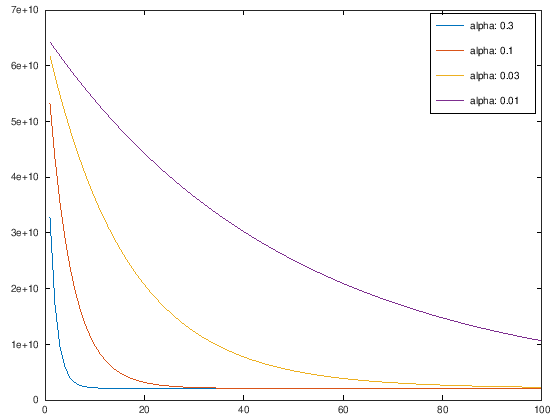

In [14]:
xlabel('Number of iterations');
ylabel('Cost J');
plot(1:numel(J1),[J1,J2,J3,J4],'LineWidth', 2); % numel -> no of elements
legend('alpha: 0.3', 'alpha: 0.1', 'alpha: 0.03', 'alpha: 0.01');   